# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [14]:
import pandas as pd
%matplotlib inline


Question 1: Is the distribution nomal
We print the histogram here after

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000005883A7C128>]], dtype=object)

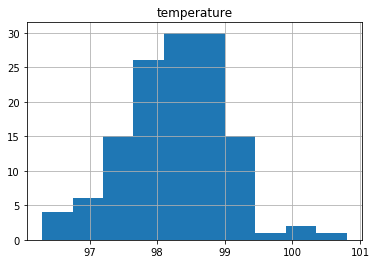

In [15]:
df = pd.read_csv('data/human_body_temperature.csv')
df.hist(column='temperature',bins=10)


The histogram represent a gaussian curve, so we can consider in first approximation, the distribution as a normal distribution.

In [51]:
Temp = df['temperature']
Tmean= Temp.mean()
Tstd = Temp.std()

print ('Mean is : ',Tmean)
print ('Standard deviation is : ',Tstd)
Prop1std = len(Temp[(Temp>Tmean-Tstd) & (Temp<Tmean+Tstd)])/len(Temp)
Prop2std = len(Temp[(Temp>Tmean-2*Tstd) & (Temp<Tmean+2*Tstd)])/len(Temp)
Prop3std = len(Temp[(Temp>Tmean-3*Tstd) & (Temp<Tmean+3*Tstd)])/len(Temp)

print('Proportion in one standard deviation is :',Prop1std)
print('Proportion in two standard deviation is :',Prop2std)
print('Proportion in three standard deviation is :',Prop3std)

Mean is :  98.24923076923078
Standard deviation is :  0.7331831580389454
Proportion in one standard deviation is : 0.6923076923076923
Proportion in two standard deviation is : 0.9461538461538461
Proportion in three standard deviation is : 0.9923076923076923


We can see the distribution follow approximativly the normal distribution with 68% for 1 std, 95% for 2 std and 97.5 for 3 std, this confirm our first analysis with the histogram.

Question 2) Is the sample size large ? Yes it is because the number of observation is > 100

Is the true population mean temperature really 98.6 degree F? 
We will use one sample test because it is the temperature of the body idependently of the sexe.
We will test how the sample differs from the standard distribution using this method of scipy



In [53]:
import scipy.stats as stats

print(stats.normaltest(Temp))


NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)


The pvalue of the distribution is approximatively 26% is greather than the general 5% thresold so not significant. The Null hypothesis can't be rejected. So we can do the assumption the temperature are normally distributed.

H0 = 98.6

H1 <> 98.6

And alpha = 5%

Question 3)

We can use a t test because the population > 30 and we use the statsmodel library to do the test


In [55]:
from statsmodels.stats.weightstats import ztest
print(ztest(Temp,value=98.6))

(-5.4548232923645195, 4.9021570141012155e-08)


So the p value obtained is very small compared to the thresold of 5%, we reject the null hypothesis saying the true population temperature mean is 98.6.

Question 4)

At what temperature should we considere the temperature abnormal?

A 95% confidence interval would be good. 
The margin of error (merr) = critical value x standard error
The critical value is 1.96 for a 95% confidence interval and the standard error (stderr) is:



In [58]:
import numpy as np
stderr = Tstd/np.sqrt(len(Temp))
merr = 1.96*stderr
ci = [Tmean-merr,Tmean+merr]
print(ci)

[98.123194112228518, 98.375267426233037]


So we can consider the temperature is abnormal if it is not in this interval.

Question 5) Is there a sigificant difference between male and female in normal temperature

In [62]:
dfFemale=df.loc[df['gender']=='F']
dfMale=df.loc[df['gender']=='M']

print('Mean for female :',dfFemale['temperature'].mean())
print('Mean for male   :',dfMale['temperature'].mean())
print('Length female   obs :',len(dfFemale['temperature']))
print('Length male     obs :',len(dfMale['temperature']))

Mean for female : 98.39384615384613
Mean for male   : 98.1046153846154
Length female   obs : 65
Length male     obs : 65


We will use a two sample Tests to check the difference between the means of two independent populations is equal to the target value.

In [64]:
print(stats.ttest_ind(dfFemale['temperature'],dfMale['temperature']))

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)


# With this small p value we can reject the null hypothesis and conclude, temperatures difference are significant between men and women but The temperature mean for the true population is 98.6